# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = ваш балл + котобонус

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Чтобы можно было воспроизводить полученные результаты

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ

Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков**

In [150]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [151]:
# 1)

random_rows = df_train.sample(10)

random_rows

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [152]:
# 2)

first_5 = df_test.head(5)
last_5 = df_test.tail(5)

first_5

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [153]:
last_5

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [154]:
# 3)

missing_columns_train = df_train.columns[df_train.isnull().any()].tolist()
missing_columns_test = df_test.columns[df_test.isna().any()].tolist()
print(missing_columns_train, missing_columns_test)

['mileage', 'engine', 'max_power', 'torque', 'seats'] ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [155]:
# 4)

duplicates_exist_train = df_train.duplicated().any()
duplicates_exist_test = df_test.duplicated().any()

print(duplicates_exist_train, duplicates_exist_test)


True True


In [156]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Profiling Report")

In [157]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [158]:
# your code here

# Я вначале преобразую то, что нужно к числовым значениям, чтобы их было легче зафилиить

columns_to_clean = ['mileage', 'engine', 'max_power']

def clean_column(column):
    return column.str.extract(r'([\d\.]+)').astype(float)

for col in columns_to_clean:
    df_train[col] = clean_column(df_train[col])
for col in columns_to_clean:
    df_test[col] = clean_column(df_test[col])

print(df_train.dtypes)
print(df_test.dtypes)

numeric_cols = df_train.select_dtypes(include=['number']).columns

categorical_cols = df_train.select_dtypes(exclude=['number']).columns

medians = df_train[numeric_cols].median()

modes = df_train[categorical_cols].mode().iloc[0]
df_train[categorical_cols] = df_train[categorical_cols].fillna(modes)
df_test[categorical_cols] = df_test[categorical_cols].fillna(modes)

df_train[numeric_cols] = df_train[numeric_cols].fillna(medians)
df_test[numeric_cols] = df_test[numeric_cols].fillna(medians)

print("Пропуски в тренировочном наборе:\n", df_train.isnull().sum())
print("Пропуски в тестовом наборе:\n", df_test.isnull().sum())

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object
Пропуски в тренировочном наборе:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64
Пропуски в тестовом наборе:


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [159]:
# your code here

feature_columns = df_train.columns.drop('selling_price')
duplicates = df_train.duplicated(subset=feature_columns, keep=False)
duplicates.sum()

1799

In [160]:
df_train[duplicates]

name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
22        45000  Petrol  Individual       Manual   First Owner    21.40   
26        25000  Petrol  Individual       Manual   First Owner    16.80   
27        70000  Diesel  Individual       Manual   First Owner    24.30   
28        50000  Petrol  Individual       Manual  Second Owner    19.30   
29        35000  Petrol  Individual       Manual  Second Owner    14.00   
...         ...     ...         ...          ...           ...      ...   
6981      24000  Diesel  Individual       Manual   First Owner    24.40   
6984      24000  Diesel  Individual       Manual   First Owner    24.40   
6989      50000  Diesel  Individual       Manual   First Owner    26.59   
6997      25000  Diesel  Individual       Manual   First Owner    23.57   
6998      25000  Diesel  Individual       Manual   First Owner    23.57   

      engine  max_power               torque  seats  
22    1197.0      83.10       115Nm@ 4000rpm    5.0  
26     796.0      34.20        59Nm@ 2500rpm    8.0  
27    1248.0      88.50       200Nm@ 1750rpm    5.0  
28    1248.0      82.00       190Nm@ 2000rpm    5.0  
29     796.0      35.00      6.1kgm@ 3000rpm    5.0  
...      ...        ...                  ...    ...  
6981  1498.0      98.63  215Nm@ 1750-3000rpm    5.0  
6984  1498.0      98.63  215Nm@ 1750-3000rpm    5.0  
6989  1248.0      74.00       190Nm@ 2000rpm    5.0  
6997  1396.0      70.00  140Nm@ 1800-3000rpm    5.0  
6998  1396.0      70.00  140Nm@ 1800-3000rpm    5.0  

[1799 rows x 13 columns]

In [161]:
df_train = df_train.drop_duplicates(subset=feature_columns, keep='first')
df_train.reset_index(drop=True, inplace=True)

In [162]:
assert df_train.shape == (5840, 13)

In [163]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power                     torque  seats  
0         74.00             190Nm@ 2000rpm    5.0  
1        103.52        250Nm@ 1500-2500rpm    5.0  
2         90.00   22.4 kgm at 1750-2750rpm    5.0  
3         88.20      11.5@ 4,500(kgm@ rpm)    5.0  
4         81.86          113.75nm@ 4000rpm    5.0  
...         ...                        ...    ...  
5835      62.10            96.1Nm@ 3000rpm    5.0  
5836      67.10              90Nm@ 3500rpm    5.0  
5837      82.85           113.7Nm@ 4000rpm    5.0  
5838     110.00  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839      73.90             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [164]:
# your code here

columns_to_clean = ['mileage', 'engine', 'max_power']

def clean_column(column):
    return column.str.extract(r'([\d\.]+)').astype(float)

# for col in columns_to_clean:
#     df_train[col] = clean_column(df_train[col])
# for col in columns_to_clean:
#     df_test[col] = clean_column(df_test[col])

df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

print(df_train.dtypes)
print(df_test.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object


<ipython-input-164-12ed2e63c0bd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['torque'], inplace=True)


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [165]:
# your code here

df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

print(df_train.dtypes[['engine', 'seats']])
print(df_test.dtypes[['engine', 'seats']])

engine    int64
seats     int64
dtype: object
engine    int64
seats     int64
dtype: object


<ipython-input-165-b324edbe4252>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['engine'] = df_train['engine'].astype(int)
<ipython-input-165-b324edbe4252>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['seats'] = df_train['seats'].astype(int)


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [166]:
# your code here

df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [167]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.844330     5.403000  
std      34.892709     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [168]:
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [169]:
df_test.describe(include=['object'])

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

## **Визуализации**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

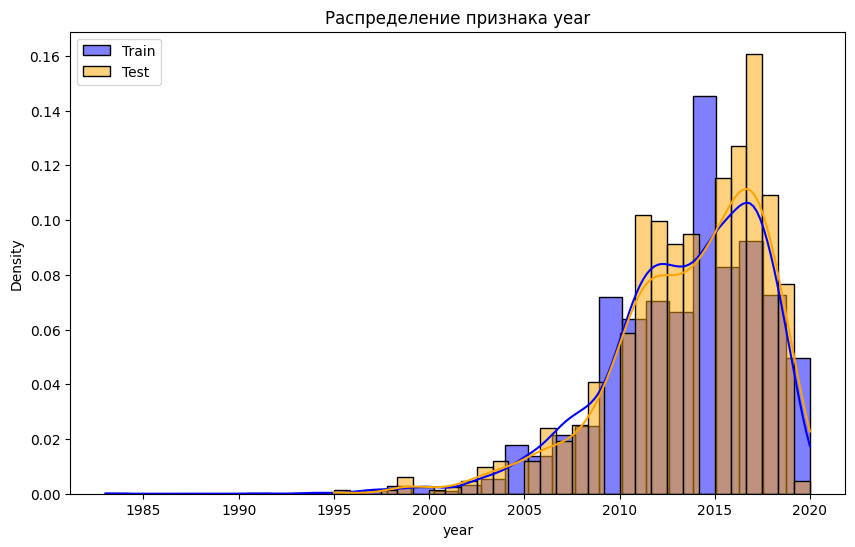

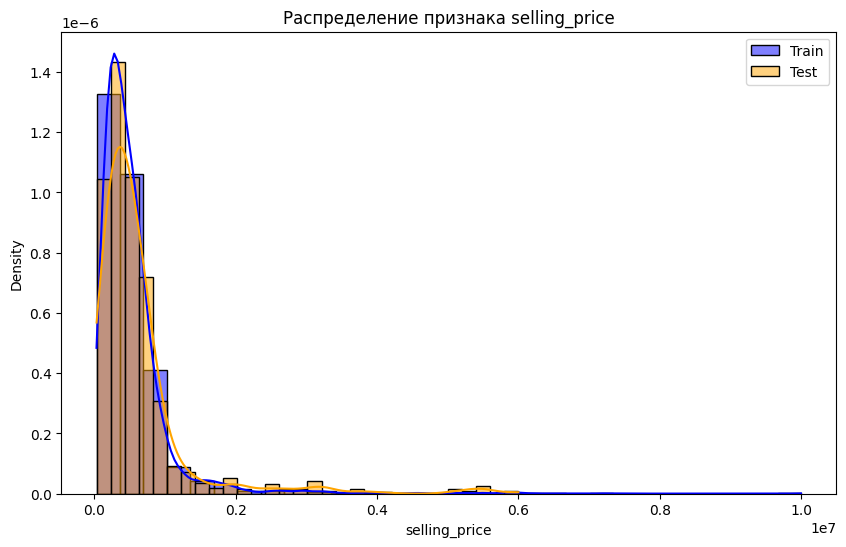

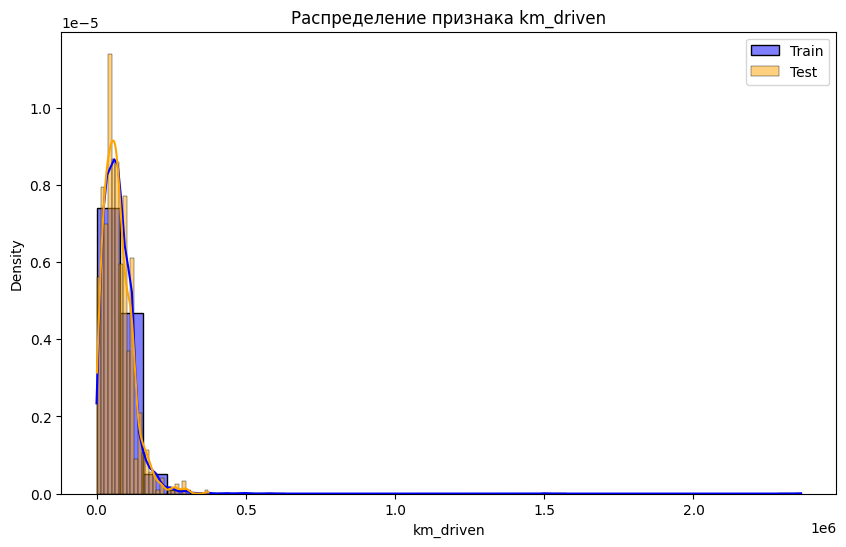

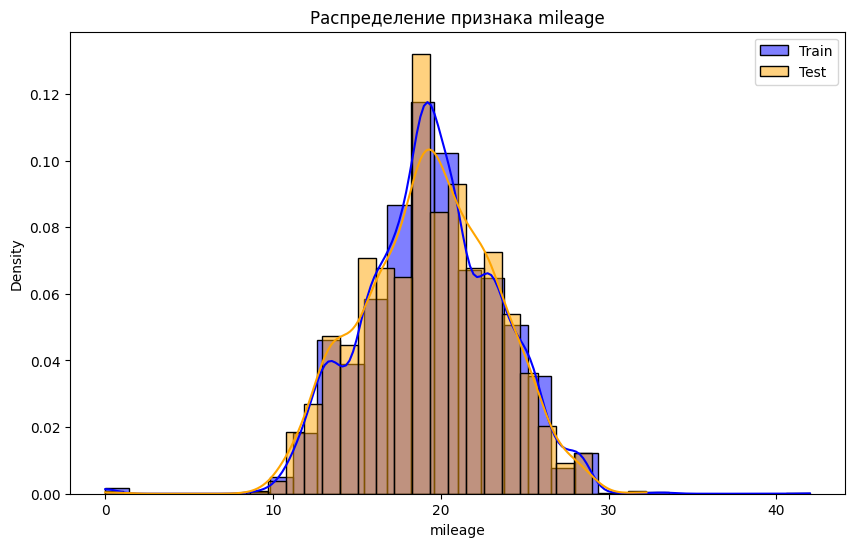

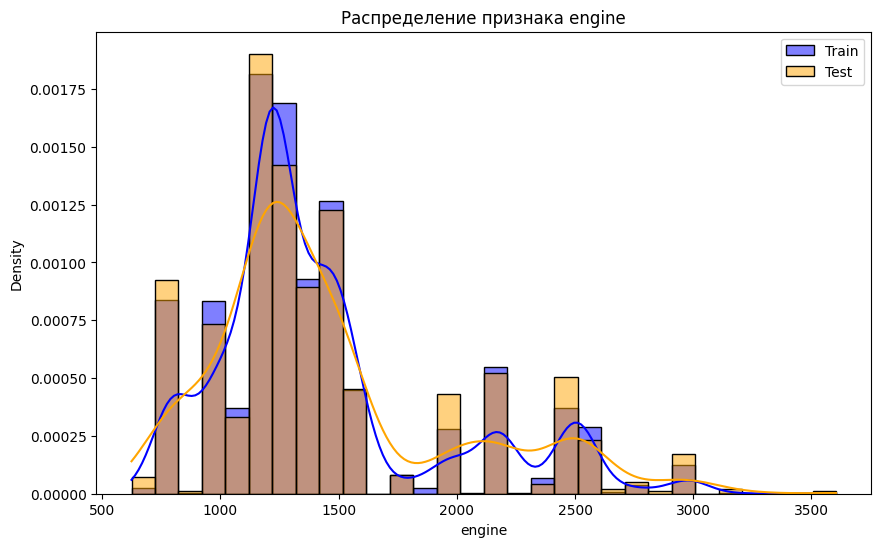

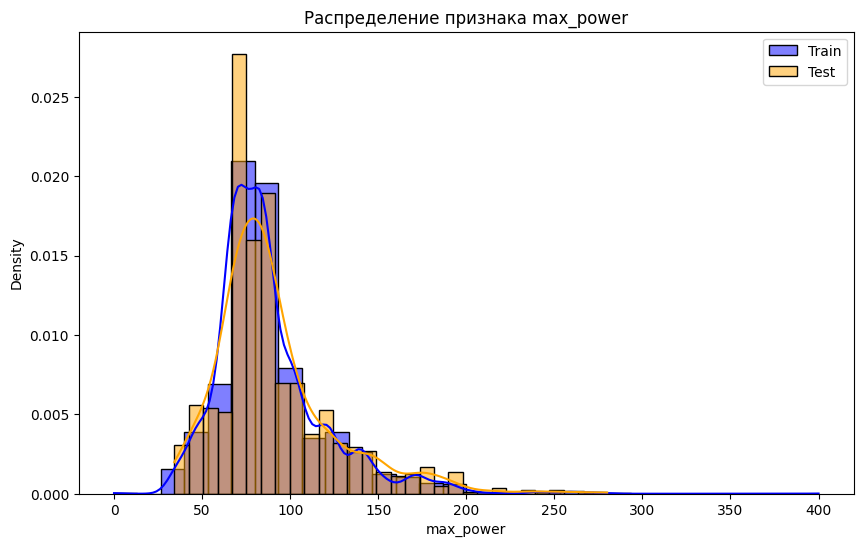

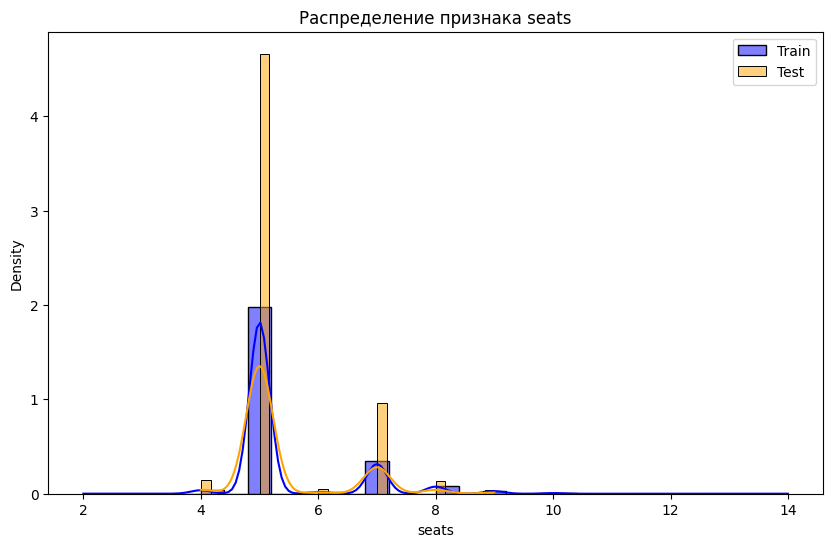

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = df_train.select_dtypes(include=['float64', 'int64']).columns


for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train[feature], kde=True, color='blue', label='Train', stat='density', bins=30)
    sns.histplot(df_test[feature], kde=True, color='orange', label='Test', stat='density', bins=30)
    plt.title(f"Распределение признака {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

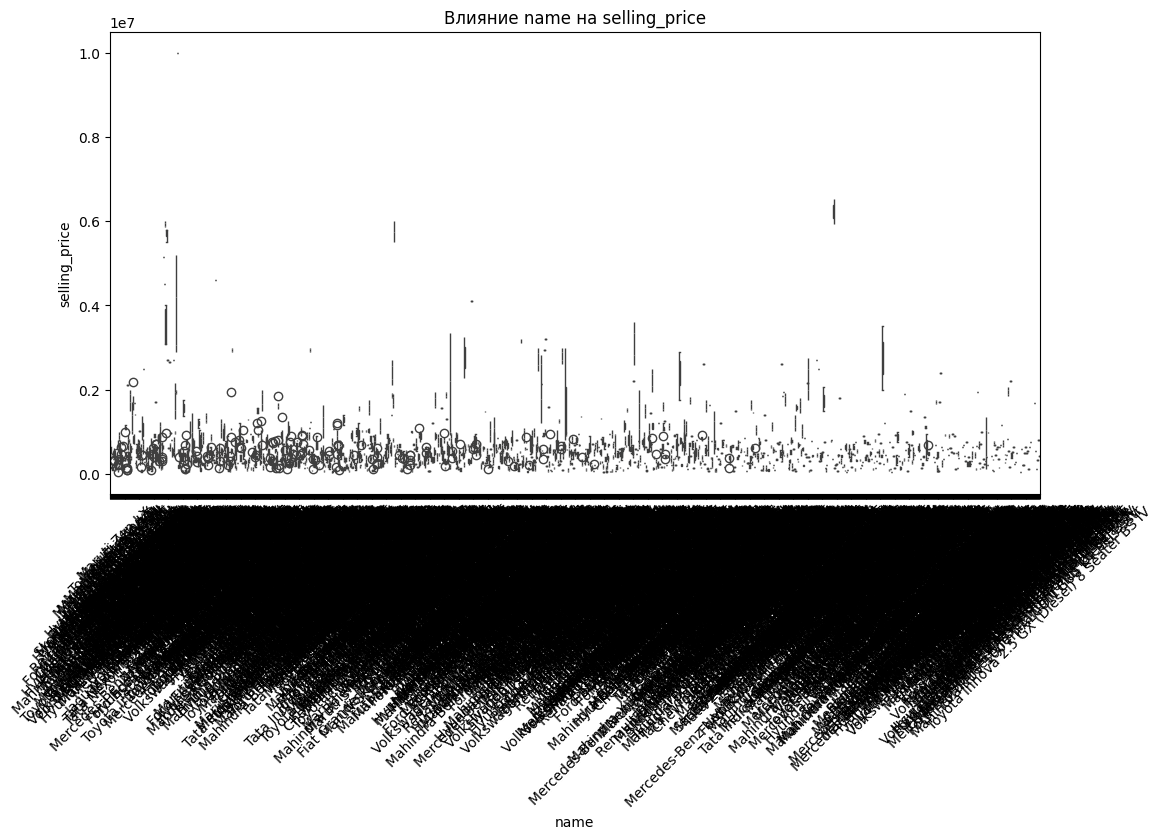

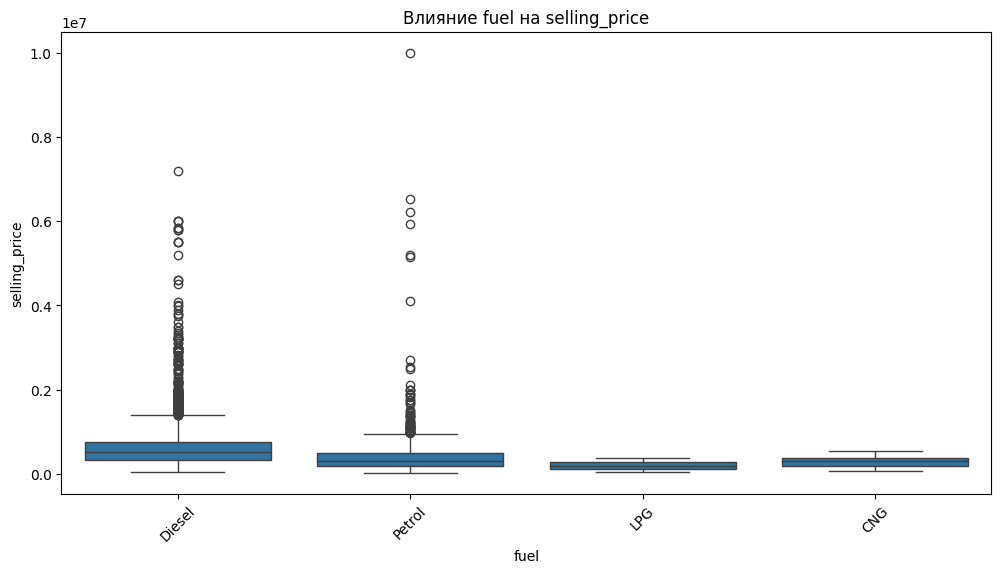

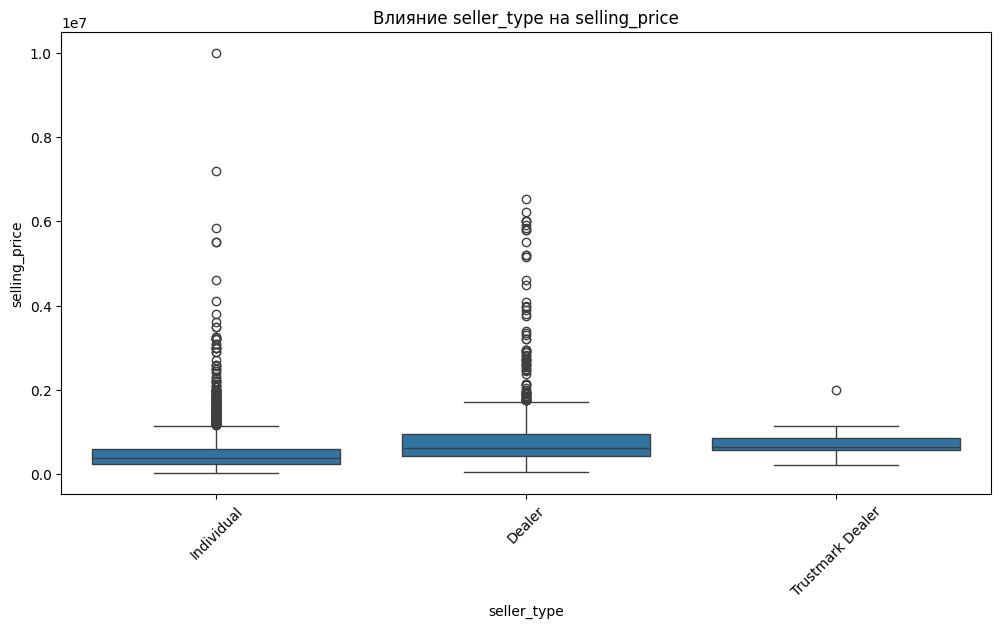

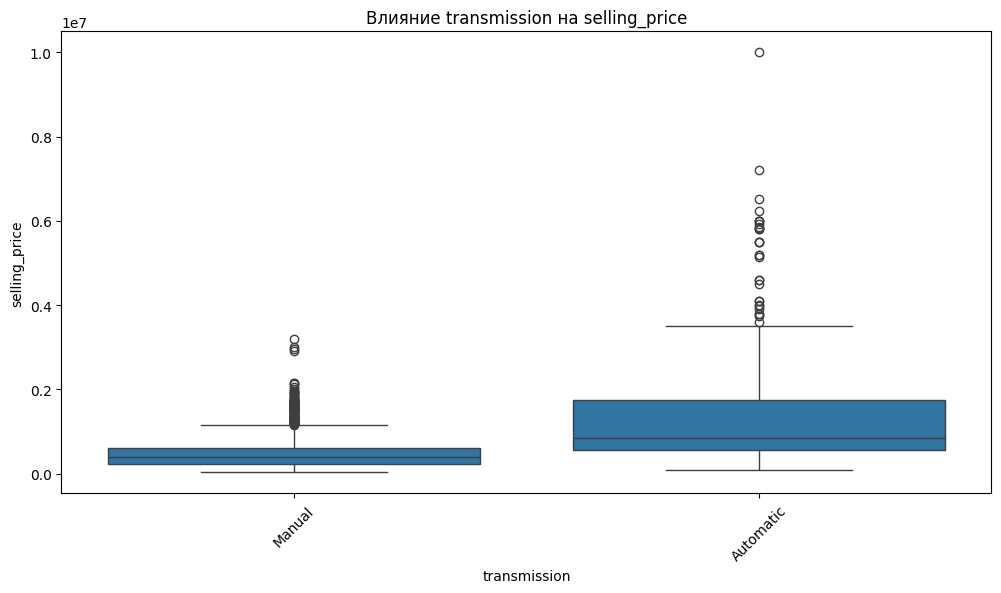

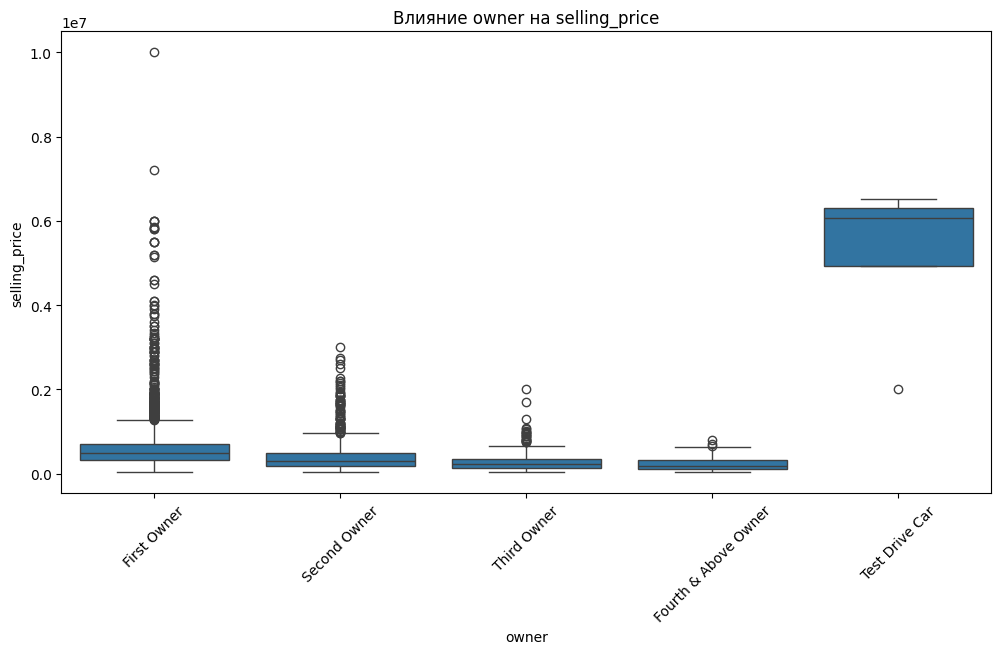

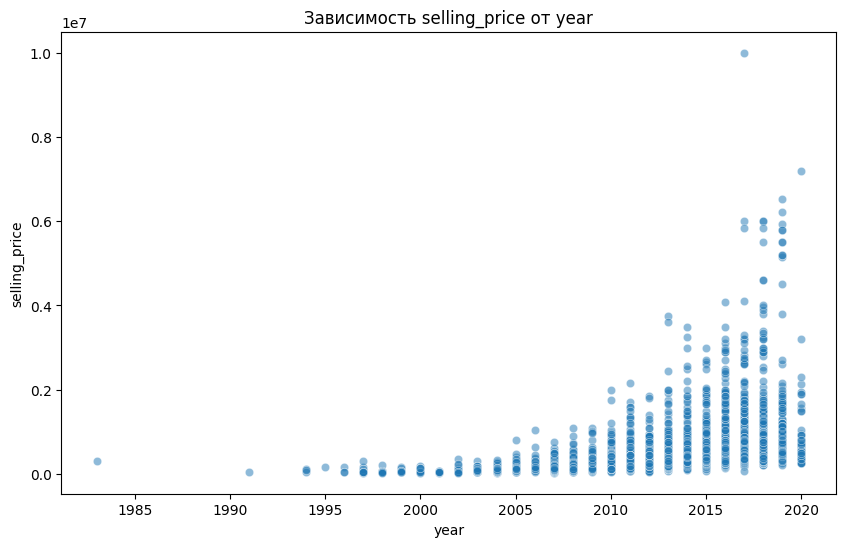

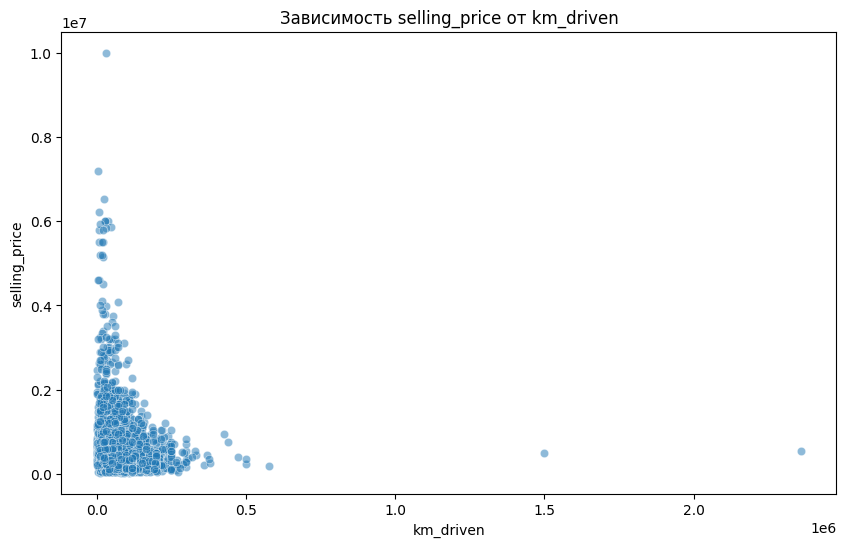

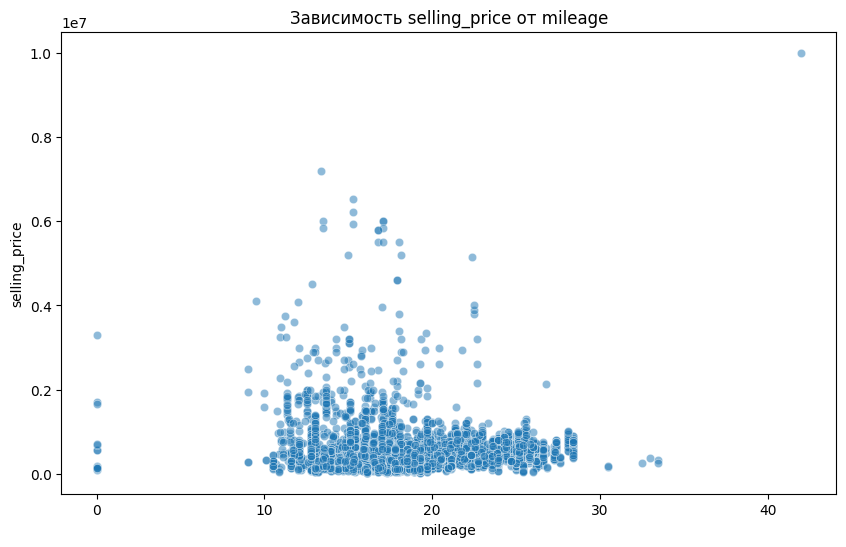

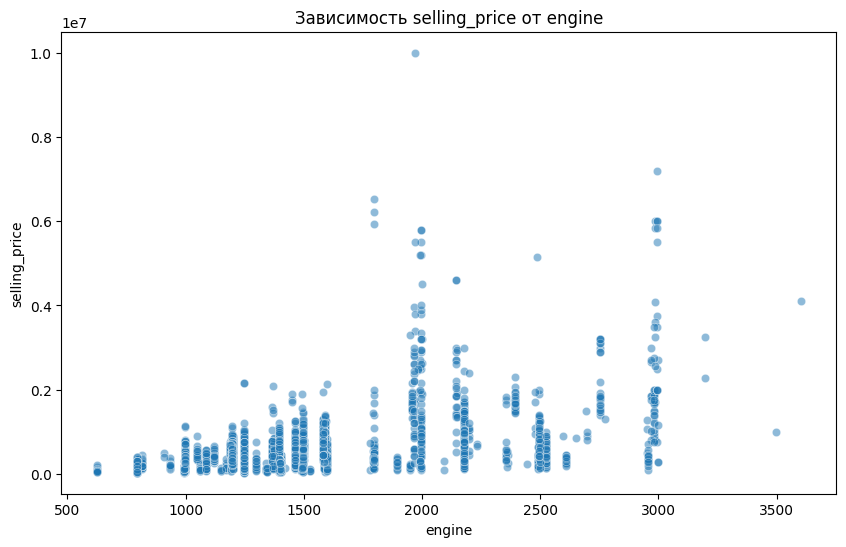

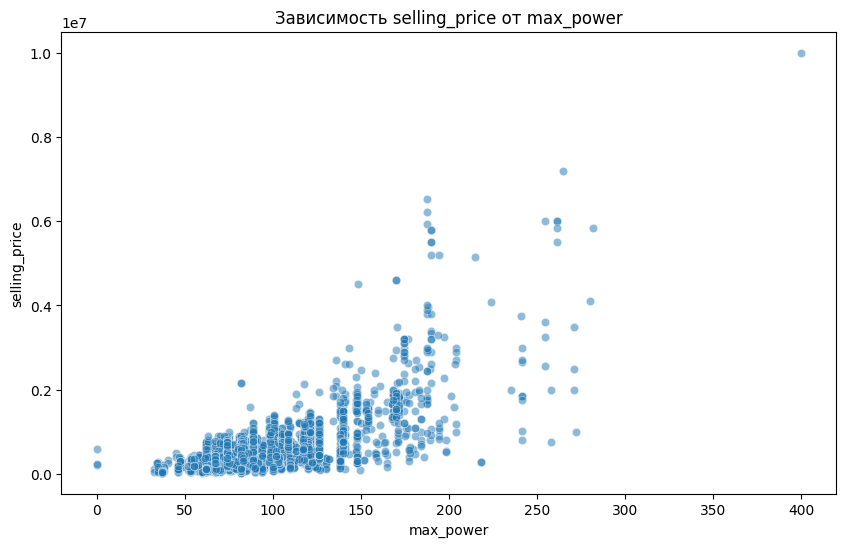

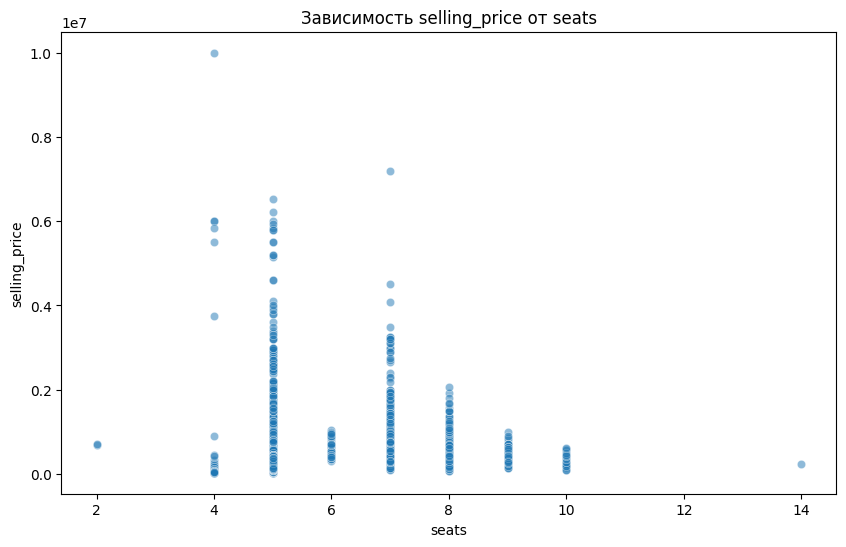

In [171]:
categorical_features = df_train.select_dtypes(include=['object']).columns
target = 'selling_price'

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_train, x=feature, y=target)
    plt.title(f"Влияние {feature} на {target}")
    plt.xticks(rotation=45)
    plt.show()

for feature in numeric_features:
    if feature != target:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_train, x=feature, y=target, alpha=0.5)
        plt.title(f"Зависимость {target} от {feature}")
        plt.show()

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

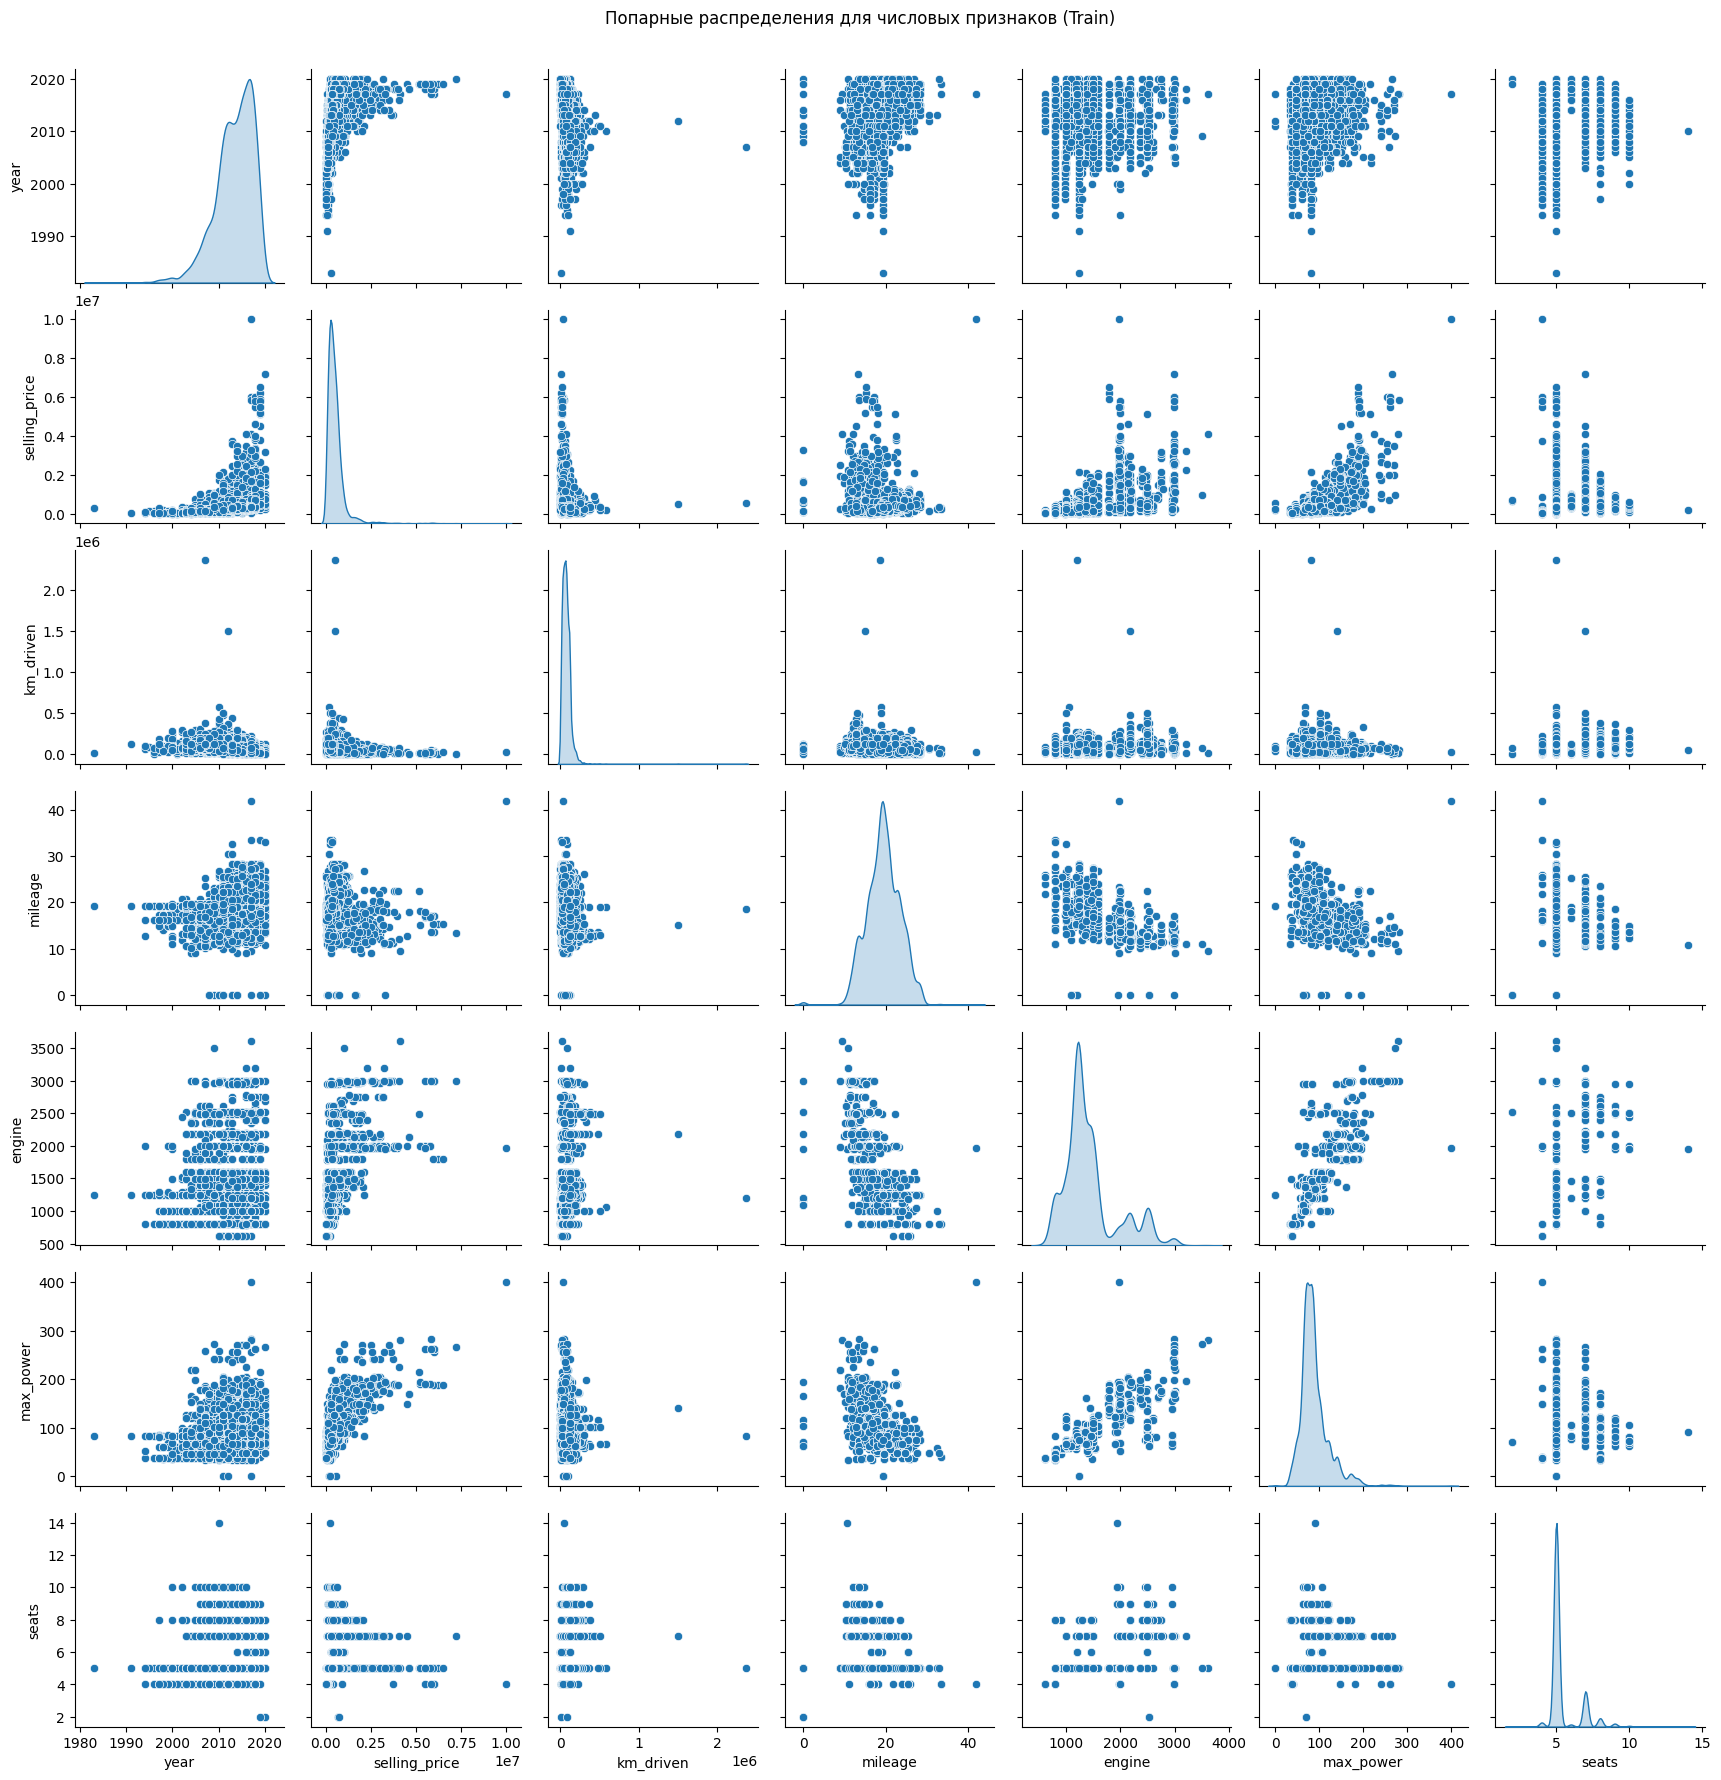

In [172]:
# your code here


sns.pairplot(df_train, diag_kind="kde", height=2.5)
plt.suptitle("Попарные распределения для числовых признаков (Train)", y=1.02)
plt.show()


Мне кажется, что между годом и ценой продажи есть связь, но в целом это и логично, чем новее машина тем больше она будет стоить, скорее всего, но при прочих равных, более новая машина точно будет стоить больше

Про корелляцию признаков сложно что-то сказать из графиков, мне кажется, что проще это посчитать и проверить численнно

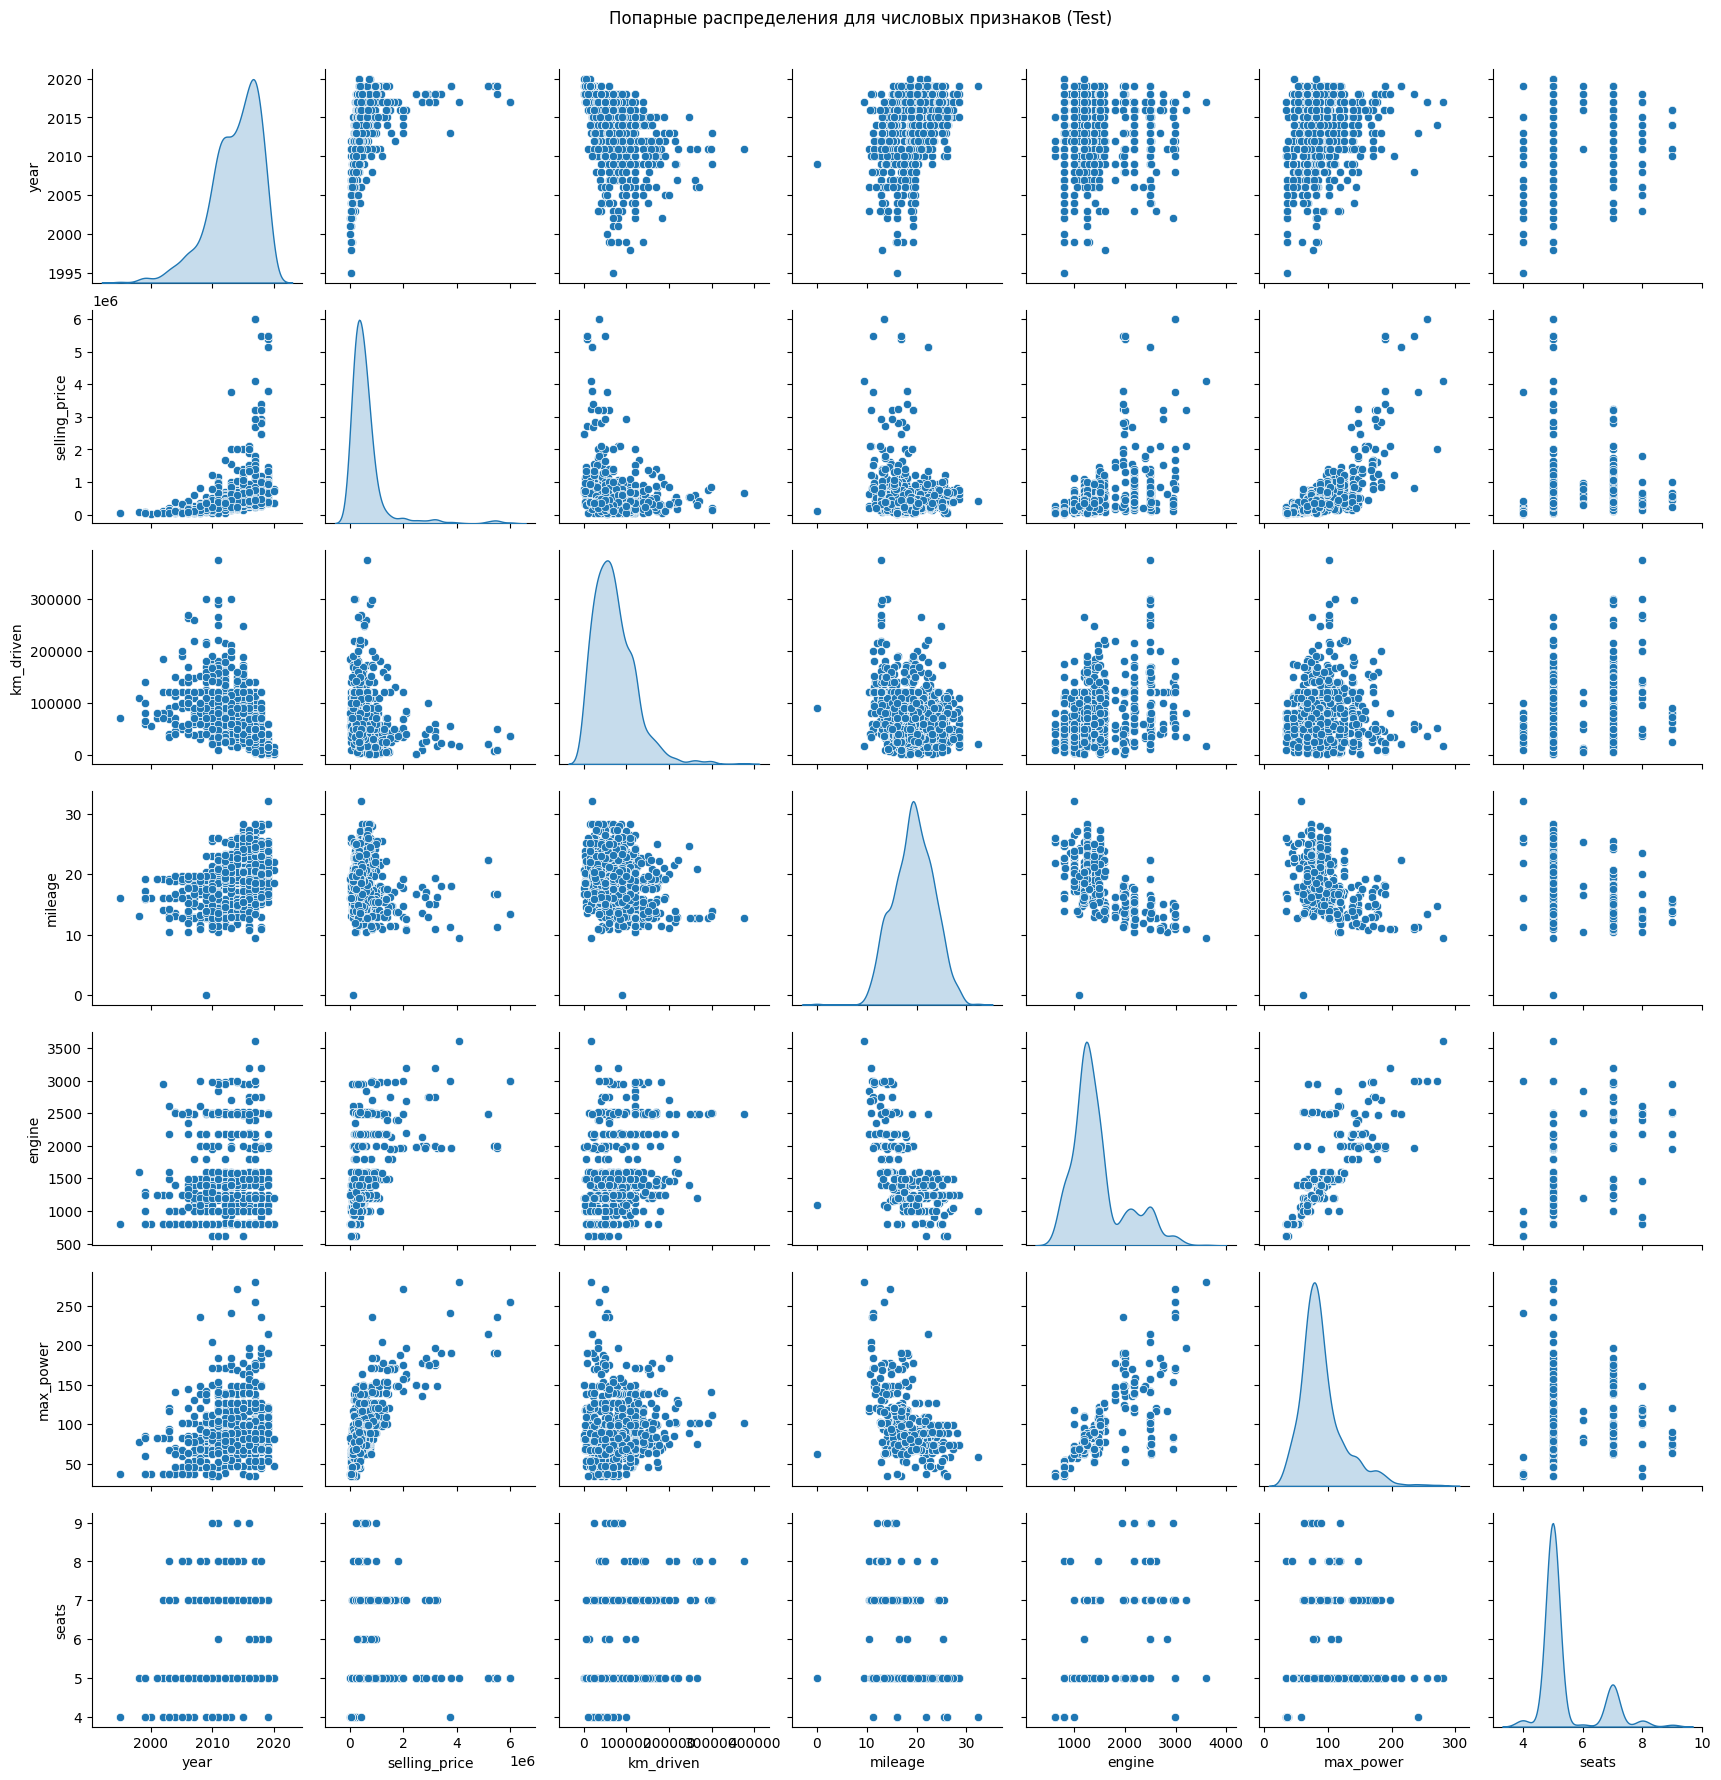

In [173]:
# your code here
sns.pairplot(df_test, diag_kind="kde", height=2.5)
plt.suptitle("Попарные распределения для числовых признаков (Test)", y=1.02)
plt.show()

Кажется, что выборки похожи, это хорошо

`Your answer here`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


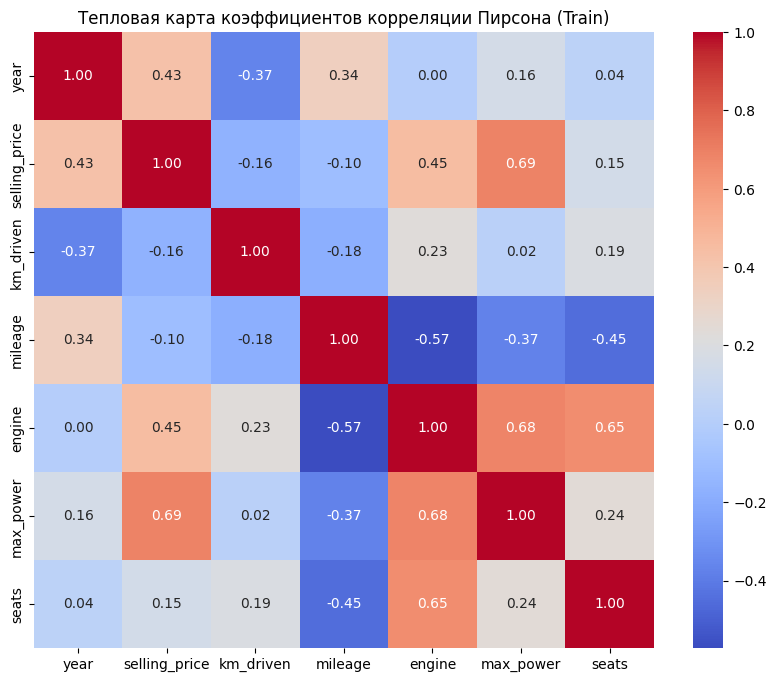

In [174]:
# your code here


take_this=df_train.select_dtypes(include=[float, int]).columns

correlation_matrix = df_train[take_this].corr()


# Построение тепловой карты (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Тепловая карта коэффициентов корреляции Пирсона (Train)")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

* Самая большая корелляция между max_power и selling_price, а наименьшая между year and engine
* Думаю нет, не правильно, так как наличие корреляции не говорит о причино-следственных связях, но в целом это логично, так как машина просто больше прожила, значит, что скорее всего она больше проехала в среднем, но из наличие корелляции такой вывод сделать нельзя

Грубо говоря, да, можно утверждать, что "в среднем старые машины имеют больший пробег", но с оговоркой, что это статистическая зависимость, а не причинно-следственная связь.

`Your answer here`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

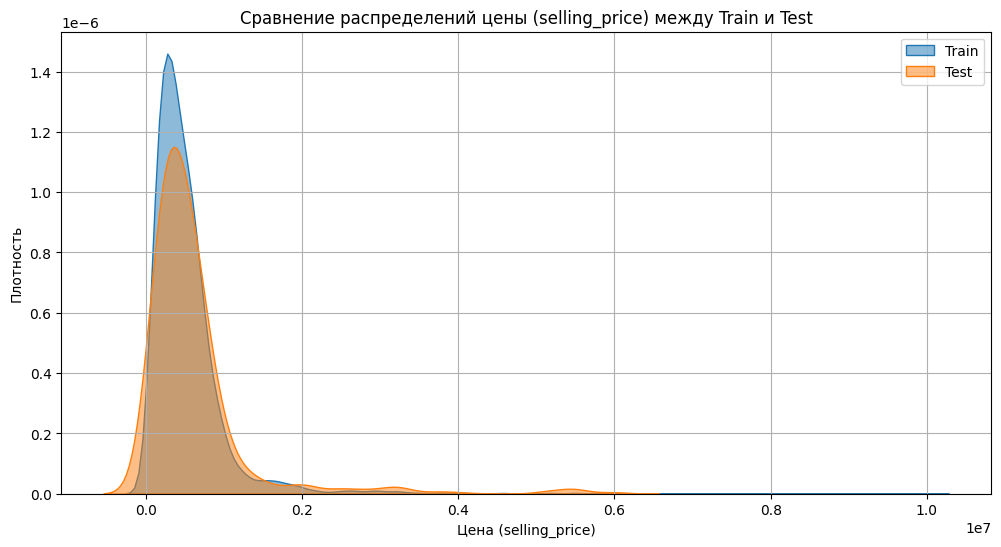

In [175]:
# your code here

# KDE-графики для сравнения распределения цены (selling_price) в train и test
plt.figure(figsize=(12, 6))
sns.kdeplot(df_train['selling_price'], label='Train', fill=True, alpha=0.5)
sns.kdeplot(df_test['selling_price'], label='Test', fill=True, alpha=0.5)
plt.title('Сравнение распределений цены (selling_price) между Train и Test')
plt.xlabel('Цена (selling_price)')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [176]:
df_train_numeric = df_train.select_dtypes(include=['float64', 'int64']).copy()

df_test_numeric = df_test.select_dtypes(include=['float64', 'int64']).copy()


#df_train_numeric = df_train_numeric.drop(columns=['seats'], errors='ignore')

target_column = 'selling_price'

In [177]:
y_train = df_train_numeric[target_column]
X_train = df_train_numeric.drop(columns=[target_column], errors='ignore')

In [178]:
assert X_train.shape == (5840, 6)

In [179]:
y_test = df_test_numeric[target_column]
X_test = df_test_numeric.drop(columns=[target_column], errors='ignore')

In [180]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

model = LinearRegression()


model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred_lin = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred_lin)
mse_test = MSE(y_test, y_test_pred_lin)

print("Training Metrics:")
print(f"R^2: {r2_train:.4f}")
print(f"MSE: {mse_train:.4f}")

print("\nTesting Metrics:")
print(f"R^2: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")

Training Metrics:
R^2: 0.5923
MSE: 116873067751.5216

Testing Metrics:
R^2: 0.5941
MSE: 233297548204.6106


$R^2$ на двух выборках примерно одинаковый, что говорит о том, что скорее всего нет переобучения и тд, но на тесте сильно выросла MSE, скорее всего мы плохо предсказываем)

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [182]:
from sklearn.preprocessing import StandardScaler

# your code here

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Training data after standardization:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

print("Testing data after standardization:")
print(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())

Training data after standardization:
       year  km_driven   mileage    engine  max_power     seats
0  0.139570   1.191152  0.996413 -0.373643  -0.439701 -0.434419
1  0.139570   0.766619  0.429384  0.141162   0.493387 -0.434419
2 -0.837167   0.883158  0.896054 -0.068879   0.066037 -0.434419
3 -1.569719   0.766619 -0.835142 -0.270682   0.009142 -0.434419
4  0.872122  -0.482007  0.178486 -0.478663  -0.191257 -0.434419
Testing data after standardization:
       year  km_driven   mileage    engine  max_power     seats
0 -0.837167   1.565740 -1.362027  2.200379   0.761428  1.601702
1  0.872122  -0.814974  0.519707  0.139102   0.650798 -0.434419
2 -1.569719   2.405866 -1.638015  0.760986   1.330385 -0.434419
3  0.383754   1.648982  1.422940  0.141162   0.337872 -0.434419
4 -0.592983  -0.065798 -0.734782 -0.530144  -0.724180 -0.434419


In [225]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

model = LinearRegression()


model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred_scaled)
mse_test = MSE(y_test, y_test_pred_scaled)

print("Training Metrics:")
print(f"R^2: {r2_train:.4f}")
print(f"MSE: {mse_train:.4f}")

print("\nTesting Metrics:")
print(f"R^2: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")

Training Metrics:
R^2: 0.5923
MSE: 116873067751.5216

Testing Metrics:
R^2: 0.5941
MSE: 233297548204.6033


Что-то не сильно помогло

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [184]:
# your code here

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
most_informative = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("Коэффициенты модели:")
print(coef_df)

most_important_feature = most_informative.iloc[0]
print("\nНаиболее важный признак:")
print(most_important_feature)


Коэффициенты модели:
     Feature    Coefficient  Abs_Coefficient
0       year  152843.262358    152843.262358
1  km_driven  -44148.047511     44148.047511
2    mileage   28781.086595     28781.086595
3     engine   61176.857150     61176.857150
4  max_power  322779.703236    322779.703236
5      seats  -23220.570226     23220.570226

Наиболее важный признак:
Feature                max_power
Coefficient        322779.703236
Abs_Coefficient    322779.703236
Name: 4, dtype: object


Как видим максимальная мощность оказалось важной признаком

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [210]:
from sklearn.linear_model import Lasso

# your code here

lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred_lasso_scaled = lasso_model.predict(X_test_scaled)

lasso_train_r2 = r2_score(y_train, y_train_pred)
lasso_train_mse = MSE(y_train, y_train_pred)

lasso_test_r2 = r2_score(y_test, y_test_pred_lasso_scaled)
lasso_test_mse = MSE(y_test, y_test_pred_lasso_scaled)

print("Training Metrics:")
print(f"R^2: {lasso_train_r2:.4f}")
print(f"MSE: {lasso_train_mse:.4f}")

print("\nTesting Metrics:")
print(f"R^2: {lasso_test_r2:.4f}")
print(f"MSE: {lasso_test_mse:.4f}")

Training Metrics:
R^2: 0.5923
MSE: 116873067761.6350

Testing Metrics:
R^2: 0.5941
MSE: 233298219170.7602


In [186]:
# your code here

lasso_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_
})

zero_coefficients = lasso_coef[lasso_coef['Coefficient'] == 0]
print(f"Количество зануленных коэффициентов: {len(zero_coefficients)}")

if not zero_coefficients.empty:
    print("\nЗануленные признаки:")
    print(zero_coefficients)
else:
    print("\nL1-регуляризация не занулила коэффициенты.")

Количество зануленных коэффициентов: 0

L1-регуляризация не занулила коэффициенты.


Ничего не занулила, так как думаю слишком мало фичей, чтобы прям что-то занулять

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [187]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso = Lasso(random_state=42)

grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)


print(f"Лучший параметр alpha: {grid_search.best_params_['alpha']}")
print(f"Лучшее значение MSE (на кросс-валидации): {-grid_search.best_score_:.4f}")


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Лучший параметр alpha: 100
Лучшее значение MSE (на кросс-валидации): 121313179346.4388


In [188]:
# your code here

# Обучение модели с лучшим alpha
best_alpha = grid_search.best_params_['alpha']
lasso_best = Lasso(alpha=best_alpha, random_state=42)
lasso_best.fit(X_train_scaled, y_train)

# Получение коэффициентов
lasso_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_best.coef_
})

# Проверка зануления
zero_coefficients = lasso_coef[lasso_coef['Coefficient'] == 0]
print(f"Количество зануленных коэффициентов: {len(zero_coefficients)}")

if not zero_coefficients.empty:
    print("\nЗануленные признаки:")
    print(zero_coefficients)
else:
    print("\nL1-регуляризация не занулила коэффициенты.")


Количество зануленных коэффициентов: 0

L1-регуляризация не занулила коэффициенты.


Сколько грид-сёрчу пришлось обучать моделей?

* 50 моделей, так как 10*5

Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

100 и опять ничего не занулилось, но параметр альфа достаточной большой уже

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [189]:
from sklearn.linear_model import ElasticNet

# your code here

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]
}

elastic_net = ElasticNet(random_state=42)


grid_search_en = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_en.fit(X_train_scaled, y_train)

print(f"Лучшие параметры: {grid_search_en.best_params_}")
print(f"Лучшее значение MSE (на кросс-валидации): {-grid_search_en.best_score_:.4f}")

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.9}
Лучшее значение MSE (на кросс-валидации): 121287926218.6928


In [212]:
ElasticNet = ElasticNet(alpha=0.1,l1_ratio=0.9,random_state=42)
ElasticNet.fit(X_train_scaled, y_train)

y_train_pred_elastic=ElasticNet.predict(X_train_scaled)
y_test_pred_elastic=ElasticNet.predict(X_test_scaled)

train_mse = MSE(y_train, y_train_pred_elastic)
test_mse=MSE(y_test,y_test_pred_elastic)

train_r2 = r2_score(y_train, y_train_pred_elastic)
test_r2=r2_score(y_test,y_test_pred_elastic)

print("Training Metrics:")
print(f"R^2: {train_r2:.4f}")
print(f"MSE: {train_mse:.4f}")

print("\nTesting Metrics:")
print(f"R^2: {test_r2:.4f}")
print(f"MSE: {test_mse:.4f}")

Training Metrics:
R^2: 0.5922
MSE: 116888530098.0219

Testing Metrics:
R^2: 0.5919
MSE: 234561250090.4514


Сколько грид-сёрчу пришлось обучать моделей?
* тепер 250, так как 5*5*10
Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

альфа = 0.1 и l1 = 0.9

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [190]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40    1248   
1     Diesel  Individual       Manual          Second Owner    21.14    1498   
2     Diesel  Individual       Manual           First Owner    23.00    1396   
3     Petrol  Individual       Manual           First Owner    16.10    1298   
4     Petrol  Individual       Manual           First Owner    20.14    1197   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92    1086   
5836  Petrol  Individual       Manual          Second Owner    18.90     998   
5837  Petrol  Individual       Manual           First Owner    18.50    1197   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80    1493   
5839  Diesel  Individual       Manual           First Owner    19.30    1248   

      max_power  seats  
0         74.00      5  
1        103.52      5  
2         90.00      5  
3         88.20      5  
4         81.86      5  
...         ...    ...  
5835      62.10      5  
5836      67.10      5  
5837      82.85      5  
5838     110.00      5  
5839      73.90      5  

[5840 rows x 12 columns]

In [257]:
# your code here

df_train_new = df_train.drop(columns=['name'])
df_test_new = df_test.drop(columns=['name'])



В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

# Разделяем столбец 'name' на марку и модель


In [240]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

try:
    df_train_copy[['brand', 'model']] = df_train_copy['name'].str.split(' ', n=1, expand=True)
    df_test_copy[['brand', 'model']] = df_test_copy['name'].str.split(' ', n=1, expand=True)
    print("Успешно разделили столбец 'name' на 'brand' и 'model'.")

    df_train_copy = pd.get_dummies(df_train_copy, columns=['brand'], drop_first=True)
    df_test_copy = pd.get_dummies(df_test_copy, columns=['brand'], drop_first=True)
    print("Успешно применили One-Hot Encoding к столбцу 'brand'.")

    df_train_copy = df_train_copy.drop(columns=['name'])
    df_test_copy = df_test_copy.drop(columns=['name'])
    print("Оригинальный столбец 'name' удален.")

    df_test_copy = df_test_copy.reindex(columns=df_train_copy.columns, fill_value=0)
    print("Структура столбцов в тестовом наборе данных приведена к тренировочному.")

    print("Train columns:", df_train_copy.columns)
    print("Test columns:", df_test_copy.columns)

except Exception as e:
    print("Произошла ошибка при обработке:", str(e))


Успешно разделили столбец 'name' на 'brand' и 'model'.
Успешно применили One-Hot Encoding к столбцу 'brand'.
Оригинальный столбец 'name' удален.
Структура столбцов в тестовом наборе данных приведена к тренировочному.
Train columns: Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'model', 'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_Lexus', 'brand_MG',
       'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Peugeot', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo'],
      dtype='object')
Test columns: Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_typ

In [193]:
assert X_train_cat.shape == (5840, 10)

NameError: name 'X_train_cat' is not defined

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [258]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas


categorical_features = ['seats'] + list(df_train_new.select_dtypes(include=['object']).columns)

encoder = OneHotEncoder(drop='first', sparse_output=False)



encoded_train = encoder.fit_transform(df_train_new[categorical_features])
encoded_train_columns = encoder.get_feature_names_out(categorical_features)

print(encoded_train_columns)

encoded_test = encoder.transform(df_test_new[categorical_features])

encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_train_columns, index=df_train_new.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_train_columns, index=df_test_new.index)

df_train_new = pd.concat([df_train_new.drop(columns=categorical_features), encoded_train_df], axis=1)
df_test_new = pd.concat([df_test_new.drop(columns=categorical_features), encoded_test_df], axis=1)

print("Train dataset shape after encoding:", df_train_new.shape)
print("Test dataset shape after encoding:", df_test_new.shape)


['seats_4' 'seats_5' 'seats_6' 'seats_7' 'seats_8' 'seats_9' 'seats_10'
 'seats_14' 'fuel_Diesel' 'fuel_LPG' 'fuel_Petrol'
 'seller_type_Individual' 'seller_type_Trustmark Dealer'
 'transmission_Manual' 'owner_Fourth & Above Owner' 'owner_Second Owner'
 'owner_Test Drive Car' 'owner_Third Owner']
Train dataset shape after encoding: (5840, 24)
Test dataset shape after encoding: (1000, 24)


In [246]:
df_train_new

year  selling_price  km_driven  mileage  engine  max_power  seats_4  \
0     2014         450000     145500    23.40    1248      74.00      0.0   
1     2014         370000     120000    21.14    1498     103.52      0.0   
2     2010         225000     127000    23.00    1396      90.00      0.0   
3     2007         130000     120000    16.10    1298      88.20      0.0   
4     2017         440000      45000    20.14    1197      81.86      0.0   
...    ...            ...        ...      ...     ...        ...      ...   
5835  2008         120000     191000    17.92    1086      62.10      0.0   
5836  2013         260000      50000    18.90     998      67.10      0.0   
5837  2013         320000     110000    18.50    1197      82.85      0.0   
5838  2007         135000     119000    16.80    1493     110.00      0.0   
5839  2009         382000     120000    19.30    1248      73.90      0.0   

      seats_5  seats_6  seats_7  ...  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0         1.0      0.0      0.0  ...          1.0       0.0          0.0   
1         1.0      0.0      0.0  ...          1.0       0.0          0.0   
2         1.0      0.0      0.0  ...          1.0       0.0          0.0   
3         1.0      0.0      0.0  ...          0.0       0.0          1.0   
4         1.0      0.0      0.0  ...          0.0       0.0          1.0   
...       ...      ...      ...  ...          ...       ...          ...   
5835      1.0      0.0      0.0  ...          0.0       0.0          1.0   
5836      1.0      0.0      0.0  ...          0.0       0.0          1.0   
5837      1.0      0.0      0.0  ...          0.0       0.0          1.0   
5838      1.0      0.0      0.0  ...          1.0       0.0          0.0   
5839      1.0      0.0      0.0  ...          1.0       0.0          0.0   

      seller_type_Individual  seller_type_Trustmark Dealer  \
0                        1.0                           0.0   
1                        1.0                           0.0   
2                        1.0                           0.0   
3                        1.0                           0.0   
4                        1.0                           0.0   
...                      ...                           ...   
5835                     1.0                           0.0   
5836                     1.0                           0.0   
5837                     1.0                           0.0   
5838                     1.0                           0.0   
5839                     1.0                           0.0   

      transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                     1.0                         0.0                 0.0   
1                     1.0                         0.0                 1.0   
2                     1.0                         0.0                 0.0   
3                     1.0                         0.0                 0.0   
4                     1.0                         0.0                 0.0   
...                   ...                         ...                 ...   
5835                  1.0                         0.0                 0.0   
5836                  1.0                         0.0                 1.0   
5837                  1.0                         0.0                 0.0   
5838                  1.0                         1.0                 0.0   
5839                  1.0                         0.0                 0.0   

      owner_Test Drive Car  owner_Third Owner  
0                      0.0                0.0  
1                      0.0                0.0  
2                      0.0                0.0  
3                      0.0                0.0  
4                      0.0                0.0  
...                    ...                ...  
5835                   0.0                0.0  
5836                   0.0                0.0  
5837                   0.0                0.0  
5838              

In [252]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(df_train_new.drop('selling_price',axis=1))
X_test_scaled = scaler.transform(df_test_new.drop('selling_price',axis=1))

In [253]:
with open("encoder.pkl", "wb") as enc_file:
    pickle.dump(encoder, enc_file)

with open("scaler.pkl", "wb") as sc_file:
    pickle.dump(scaler, sc_file)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [254]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_values = [0.1, 1, 10, 100, 200, 500]

ridge = Ridge(random_state=42)

param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best alpha:", grid_search.best_params_['alpha'])
print("Best R^2 from cross-validation:", grid_search.best_score_)

best_ridge = grid_search.best_estimator_
best_ridge.fit(X_train_scaled, y_train)

y_train_pred = best_ridge.predict(X_train_scaled)
y_test_pred_ridge = best_ridge.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = MSE(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred_ridge)
test_mse = MSE(y_test, y_test_pred_ridge)

# Результаты
print("\nTraining Metrics:")
print(f"R^2: {train_r2:.4f}")
print(f"MSE: {train_mse:.4f}")

print("\nTesting Metrics:")
print(f"R^2: {test_r2:.4f}")
print(f"MSE: {test_mse:.4f}")

Best alpha: 500
Best R^2 from cross-validation: 0.6216446479458442

Training Metrics:
R^2: 0.6642
MSE: 96254877572.1592

Testing Metrics:
R^2: 0.6146
MSE: 221523210591.3955


In [255]:
import pickle
with open('best_ridge_model.pkl', 'wb') as f:
    pickle.dump(best_ridge, f)

Ответье на вопрос: Удалось ли улучшить качество прогнозов?

Как будто не сильно улучшилось, на эпсилон если только

# **Часть 4. | Бизнесовая**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [250]:
def business_metric(y_true, y_pred):
    # your code here
    relative_error = np.abs(y_true - y_pred) / y_true
    return np.mean(relative_error <= 0.1)

In [251]:
# линейная
test_metric_lr = business_metric(y_test, y_test_pred_lin)

print(f"Linear Regression - Business Metric:")
print(f"Test: {test_metric_lr:.4f}")

# линейна-scaled

test_metric_lr_scaled = business_metric(y_test, y_test_pred_scaled)

print(f"Linear Regression Scaled - Business Metric:")
print(f"Test: {test_metric_lr_scaled:.4f}")

# Аналогично для Lasso
test_metric_lasso = business_metric(y_test, y_test_pred_lasso_scaled)

print(f"\nLasso Regression - Business Metric:")
print(f"Test: {test_metric_lasso:.4f}")

test_metric_elasticnet = business_metric(y_test, y_test_pred_elastic)

print(f"\nElasticNet Regression - Business Metric:")
print(f"Test: {test_metric_elasticnet:.4f}")

# Ridge

test_metric_ridge = business_metric(y_test, y_test_pred_ridge)

print(f"\nRidge Regression - Business Metric:")
print(f"Test: {test_metric_ridge:.4f}")

Linear Regression - Business Metric:
Test: 0.2270
Linear Regression Scaled - Business Metric:
Test: 0.2270

Lasso Regression - Business Metric:
Test: 0.2270

ElasticNet Regression - Business Metric:
Test: 0.2250

Ridge Regression - Business Metric:
Test: 0.2550


 Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

 Лучше всего решаем бизнес задачу - Ridge Regression with Scaled Data

`Your answer here`

# **Часть 5 | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [222]:
!pip install fastapi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.3 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Миланы